In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs


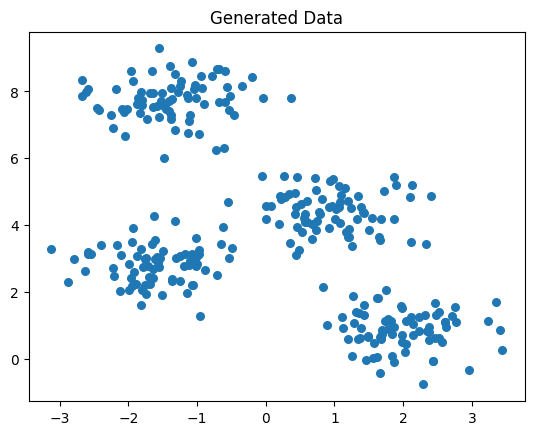

In [3]:
# Generate synthetic data
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Visualize the generated data
plt.scatter(X[:, 0], X[:, 1], s=30, cmap='viridis')
plt.title('Generated Data')
plt.show()


In [4]:
# K-means algorithm implementation
def kmeans(X, k, max_iters=100):
    # Randomly initialize the centroids by selecting random points from the data
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    
    for _ in range(max_iters):
        # Step 1: Assign points to the nearest centroid
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)  # Calculate distances to centroids
        labels = np.argmin(distances, axis=1)  # Assign each point to the closest centroid
        
        # Step 2: Recompute centroids as the mean of points in each cluster
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        # Step 3: Check for convergence (if centroids don't change)
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return centroids, labels


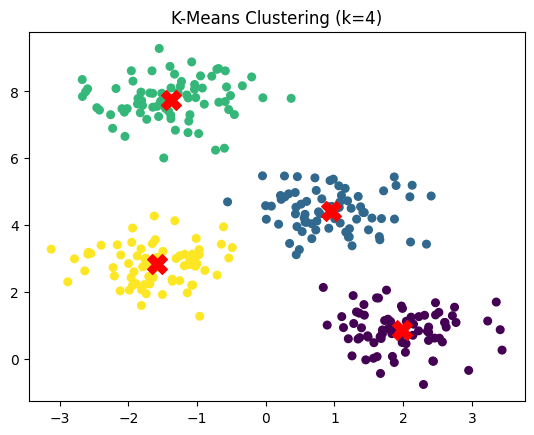

In [5]:
# Set the number of clusters
k = 4

# Run the k-means algorithm
centroids, labels = kmeans(X, k)

# Visualize the results
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30)
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', s=200, marker='X')  # Mark centroids
plt.title(f'K-Means Clustering (k={k})')
plt.show()
